In [2]:
import os
import plotters
import reader
from DataTransformer import DataTransformer

%load_ext autoreload
%autoreload 2

os.chdir('../') # work from project root so the reader gets the right paths

In [3]:
data = reader.sort_dfs(["Random",])
transformer = DataTransformer(data)

# ECDF for makespan

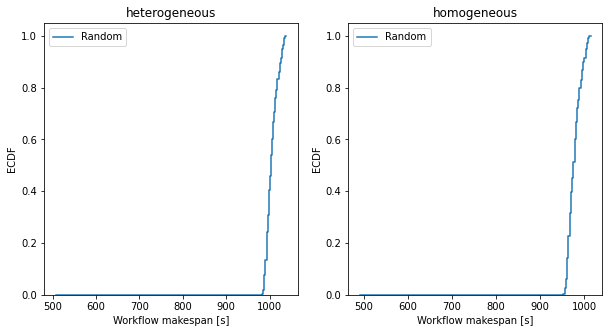

In [7]:
ecdf_data, ecdf_meta = transformer.to_makespan_cdf_per_environment("shell-parquet", "scale2", "exp_environment_ecdf.png")

plotters.create_makespan_cdf_order_policy(ecdf_data, ecdf_meta) # although created for exp 1, this works here just fine :)

# Electricity

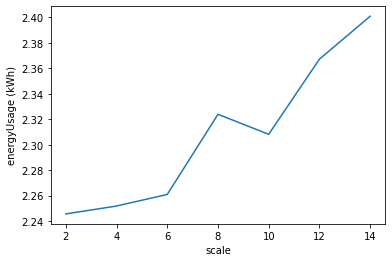

# Utilization

(              2        4         6         8         10        12        14
 policy                                                                     
 Random  0.771684  0.74825  0.718505  0.643527  0.666932  0.576667  0.547024,
 {'file_name': 'exp_scale_utilization.png'})